### PCA IMPLEMENTATION :

In [ ]:
Objective:
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

Instructions:
    Download the wine dataset from the UCI Machine Learning Repository.
    (https://archive.ics.uci.edu/ml/datasets/Wine).
    Load the dataset into a Pandas dataframe.
    Split the dataset into features and target variables.
    Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
    Implement PCA on the preprocessed dataset using the scikit-learn library.
    Determine the optimal number of principal components to retain based on the explained variance ratio.
    Visualise the results of PCA using a scatter plot.
    Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
    Interpret the results of PCA and clustering analysis.

Deliverables:
    Jupyter notebook containing the code for the PCA implementation.
    A report summarising the results of PCA and clustering analysis.
    Scatter plot showing the results of PCA.
    A table showing the performance metrics for the clustering algorithm.

Additional Information:
    You can use the python programming language.
    You can use any other machine learning libraries or tools as necessary.
    You can use any visualisation libraries or tools as necessary.


In [1]:
# Step 1: Download and Load the Wine Dataset

import pandas as pd

# Download the dataset and save it locally
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ["Class", "Alcohol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_Phenols", "Flavanoids", 
                "Nonflavanoid_Phenols", "Proanthocyanins", "Color_Intensity", "Hue", "OD280/OD315_of_Diluted_Wines", "Proline"]
wine_data = pd.read_csv(url, names=column_names)

# Check the loaded data
print(wine_data.head())


   Class  Alcohol  Malic_Acid   Ash  Alcalinity_of_Ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_Intensity   Hue  OD280/OD315_of_Diluted_Wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

In [2]:
# Step 2: Split the Dataset

X = wine_data.drop("Class", axis=1)  # Features
y = wine_data["Class"]  # Target variable


In [11]:
X.isnull().sum()

Alcohol                         0
Malic_Acid                      0
Ash                             0
Alcalinity_of_Ash               0
Magnesium                       0
Total_Phenols                   0
Flavanoids                      0
Nonflavanoid_Phenols            0
Proanthocyanins                 0
Color_Intensity                 0
Hue                             0
OD280/OD315_of_Diluted_Wines    0
Proline                         0
dtype: int64

In [3]:
# Step 3: Data Preprocessing

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# Step 4: Implement PCA

from sklearn.decomposition import PCA

# Specify the number of components you want to retain
n_components = 2  # You can adjust this based on your analysis

"""The number of component can also be decided by using the hyper-parameter tuning and it's value can be change by
   simple python programm"""

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


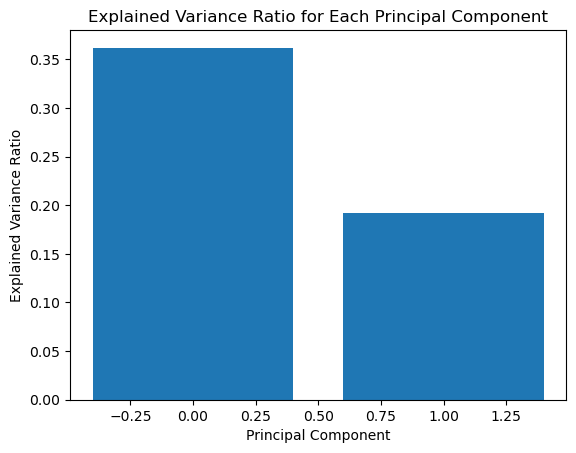

In [5]:
# Step 5: Determine Optimal Number of Components

import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_
plt.bar(range(n_components), explained_variance)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio for Each Principal Component")
plt.show()


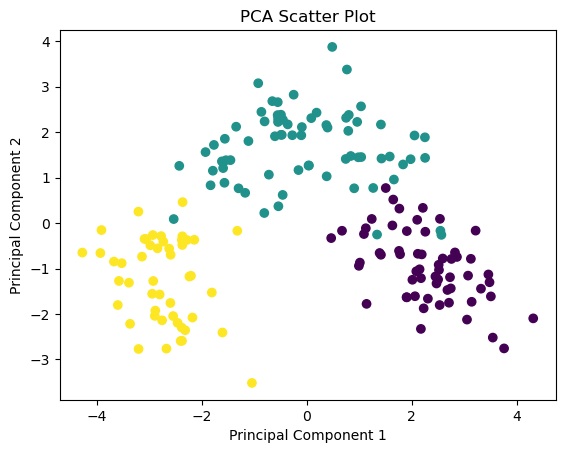

In [6]:
# Step 6: Visualize the Results

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot")
plt.show()


In [8]:
# Step 7: Perform Clustering

from sklearn.cluster import KMeans

# Specify the number of clusters
n_clusters = 3  # Adjust as needed

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_pca)
labels = kmeans.labels_
print(labels)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
"""ignore warnings"""

In [ ]:
# Step 8: Interpret Results

The above result has provided the labels assigned to each data point after performing K-Means clustering on the PCA-transformed data. 
In K-Means clustering, data points are grouped into clusters, and each data point is assigned to one of the clusters based on its similarity 
to the cluster centroids. The labels you see represent the cluster assignments for each data point.

Here's an interpretation of the results:

    Three clusters have been identified in the data, and each cluster is assigned a label: 0, 1, and 2.
    The labels indicate which cluster each data point belongs to.
    For example, if you have 178 data points, as in the Wine dataset, and you see labels like [1 1 1 1 1 ... 2 2 2 2 2], it means that the 
    first group of data points (label 1) belongs to the first cluster, the second group of data points (label 2) belongs to the second cluster,
    and so on.

In this case, there are three clusters (labels 0, 1, and 2), and the numbers correspond to the cluster assignments for each data point. 
We can further analyze and interpret these results to understand the characteristics of each cluster and how data points are grouped based on 
their features and similarities in the reduced PCA space.

DATASET LINK : https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data